---
# Pandas Foundation
---


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
movies = pd.read_csv('./movie.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movies.shape

(4916, 28)

In [5]:
movies.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

## Dissecting the anatomy of a DataFrame

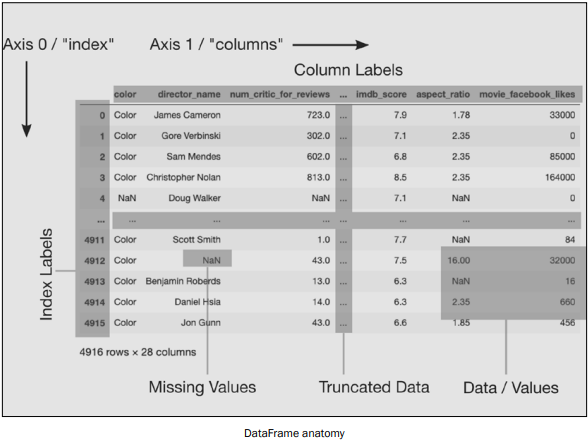

Use the DataFrame attributes index, columns, and values to assign the index, columns, and data to their own variables:

In [7]:
index = movies.index
index

RangeIndex(start=0, stop=4916, step=1)

In [8]:
column = movies.columns
column

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [9]:
data = movies.to_numpy()
data[:5]

array([['Color', 'James Cameron', 723.0, 178.0, 0.0, 855.0,
        'Joel David Moore', 1000.0, 760505847.0,
        'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar',
        886204, 4834, 'Wes Studi', 0.0,
        'avatar|future|marine|native|paraplegic',
        'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', 3054.0,
        'English', 'USA', 'PG-13', 237000000.0, 2009.0, 936.0, 7.9, 1.78,
        33000],
       ['Color', 'Gore Verbinski', 302.0, 169.0, 563.0, 1000.0,
        'Orlando Bloom', 40000.0, 309404152.0,
        'Action|Adventure|Fantasy', 'Johnny Depp',
        "Pirates of the Caribbean: At World's End", 471220, 48350,
        'Jack Davenport', 0.0,
        'goddess|marriage ceremony|marriage proposal|pirate|singapore',
        'http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1', 1238.0,
        'English', 'USA', 'PG-13', 300000000.0, 2007.0, 5000.0, 7.1,
        2.35, 0],
       ['Color', 'Sam Mendes', 602.0, 148.0, 0.0, 161.0, 'Rory Kinnear',
       

Output the Python type of each DataFrame component

In [10]:
type(index)

pandas.core.indexes.range.RangeIndex

In [11]:
type(column)

pandas.core.indexes.base.Index

In [13]:
type(data), data.shape

(numpy.ndarray, (4916, 28))

The index and the columns are closely related. Both of them are subclasses of Index. This allows you to perform similar operations on both the index and the columns:

In [14]:
issubclass(pd.RangeIndex, pd.Index)

True

In [16]:
issubclass(column.__class__, pd.Index)

True

Most of pandas relies heavily on the ndarray. Beneath the index, columns, and
data are NumPy ndarrays. They could be considered the base object for pandas that many
other objects are built upon.

In [18]:
data = movies.values
data

array([['Color', 'James Cameron', 723.0, ..., 7.9, 1.78, 33000],
       ['Color', 'Gore Verbinski', 302.0, ..., 7.1, 2.35, 0],
       ['Color', 'Sam Mendes', 602.0, ..., 6.8, 2.35, 85000],
       ...,
       ['Color', 'Benjamin Roberds', 13.0, ..., 6.3, nan, 16],
       ['Color', 'Daniel Hsia', 14.0, ..., 6.3, 2.35, 660],
       ['Color', 'Jon Gunn', 43.0, ..., 6.6, 1.85, 456]], dtype=object)

In [19]:
data = movies.to_numpy()
data

array([['Color', 'James Cameron', 723.0, ..., 7.9, 1.78, 33000],
       ['Color', 'Gore Verbinski', 302.0, ..., 7.1, 2.35, 0],
       ['Color', 'Sam Mendes', 602.0, ..., 6.8, 2.35, 85000],
       ...,
       ['Color', 'Benjamin Roberds', 13.0, ..., 6.3, nan, 16],
       ['Color', 'Daniel Hsia', 14.0, ..., 6.3, 2.35, 660],
       ['Color', 'Jon Gunn', 43.0, ..., 6.6, 1.85, 456]], dtype=object)

In [20]:
index.to_numpy()

array([   0,    1,    2, ..., 4913, 4914, 4915])

In [21]:
column.to_numpy()

array(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'], dtype=object)

---
# Understanding data types
---
We display the data type of each column in a DataFrame. After ingest data, it is crucial to know the type of data held in each column as it fundamentally changes the kind of operations that are possible with it.

**How to do it**:  
Use the `.dtypes` attribute to display each column name along with its data type.

In [22]:
movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

Use the `.value_counts` method to return the counts of each data type

In [23]:
movies.dtypes.value_counts()

float64    13
object     12
int64       3
dtype: int64

Look at the `.info` method

In [24]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4897 non-null   object 
 1   director_name              4814 non-null   object 
 2   num_critic_for_reviews     4867 non-null   float64
 3   duration                   4901 non-null   float64
 4   director_facebook_likes    4814 non-null   float64
 5   actor_3_facebook_likes     4893 non-null   float64
 6   actor_2_name               4903 non-null   object 
 7   actor_1_facebook_likes     4909 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4916 non-null   object 
 10  actor_1_name               4909 non-null   object 
 11  movie_title                4916 non-null   object 
 12  num_voted_users            4916 non-null   int64  
 13  cast_total_facebook_likes  4916 non-null   int64

Typically, when a column is of the object data type, it signals that the entire column is strings.When you load CSV files and string columns are missing values, pandas will stick in a NaN (float) for that cell.
So the column might have both object and float (missing) values in it. 
The .dtypes attribute will show the column as an object (or O on the series). It will not show it as a mixed type column (that contains both strings and floats):

In [27]:
mixte = ['Paul', np.nan, 'Eve']
mixte_serie = pd.Series(mixte)
mixte_serie

0    Paul
1     NaN
2     Eve
dtype: object

In [28]:
mixte_serie.dtype

dtype('O')